In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.shape

(20640, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
Q1 = df["total_bedrooms"].quantile(0.25)
Q3 = df["total_bedrooms"].quantile(0.75)
print ("Quartiles:", Q1, Q3)
IQR = Q3 - Q1
print("IQR:",IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower_bound", " ", "Upper_bound")
print(lower_bound, " ", upper_bound)
outliers = df[(df["total_bedrooms"] < lower_bound) |
(df["total_bedrooms"] > upper_bound)]
print("Outliers:\n", outliers)

Quartiles: 296.0 647.0
IQR: 351.0
Lower_bound   Upper_bound
-230.5   1173.5
Outliers:
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
95       -122.26     37.80                36.0       5329.0          2477.0   
96       -122.26     37.82                31.0       4596.0          1331.0   
98       -122.26     37.82                22.0       3682.0          1270.0   
100      -122.25     37.81                29.0       4656.0          1414.0   
101      -122.25     37.81                28.0       5806.0          1603.0   
...          ...       ...                 ...          ...             ...   
20539    -121.71     38.56                20.0       8627.0          1516.0   
20543    -121.74     38.55                33.0       6861.0          1820.0   
20544    -121.76     38.55                23.0       8800.0          1857.0   
20563    -121.75     38.67                 9.0      12139.0          2640.0   
20629    -121.39     39.12                28

In [11]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(),inplace=True)

In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
Numerical = df.select_dtypes(include=[np.number]).columns
print(Numerical)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


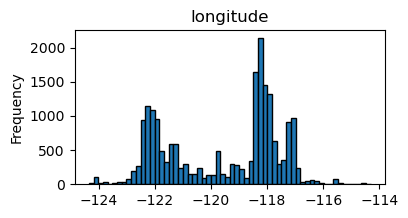

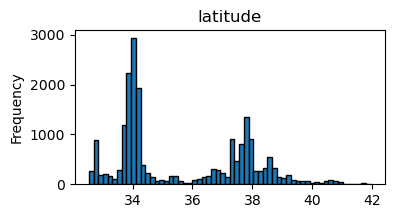

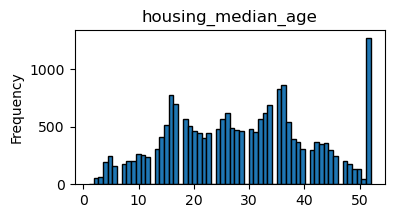

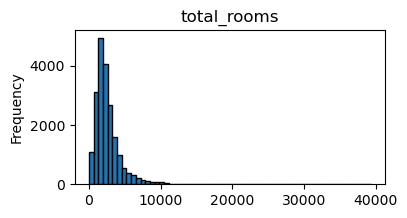

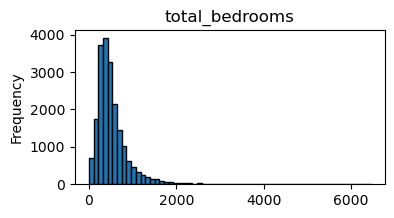

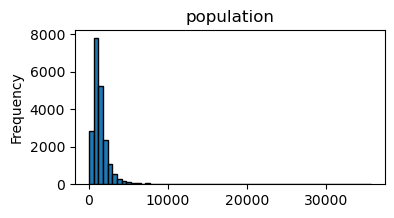

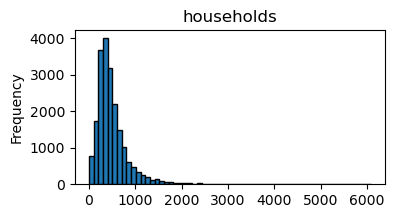

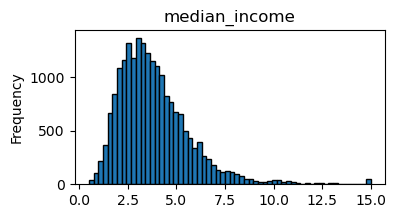

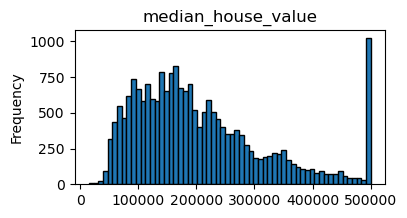

In [14]:
for col in Numerical:
    plt.figure(figsize=(4, 2))
    df[col].plot(kind='hist', title=col, bins=60, edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

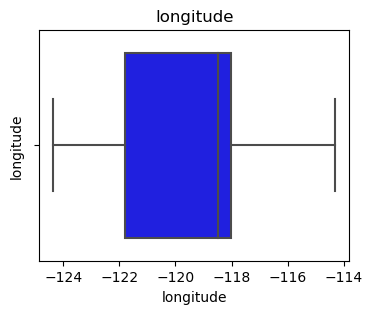

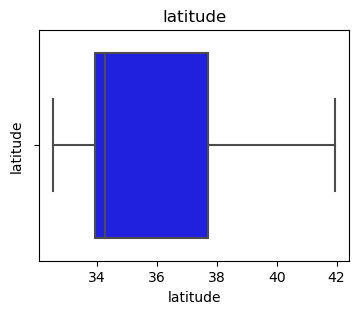

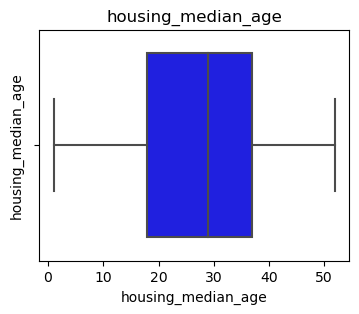

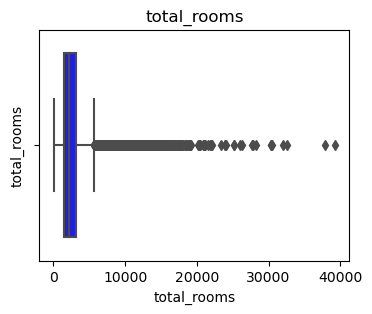

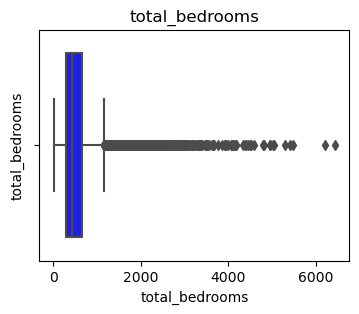

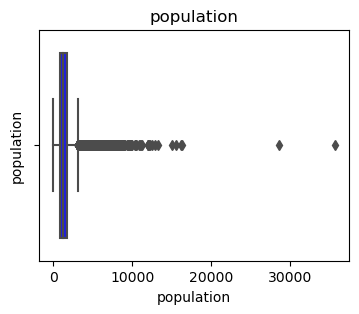

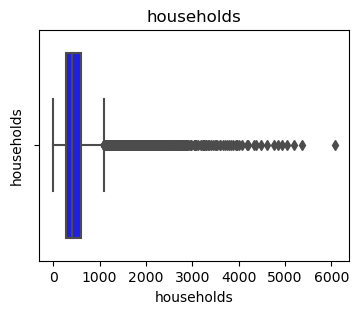

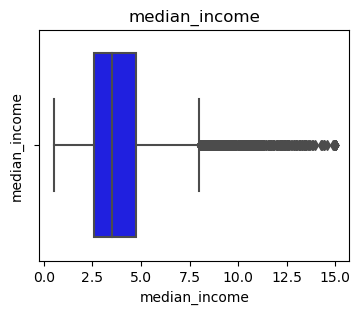

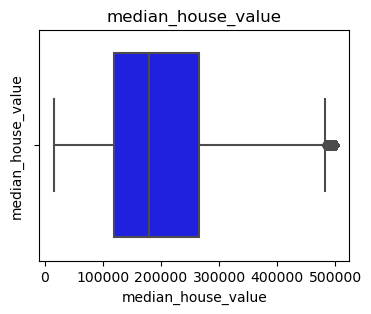

In [15]:
for col in Numerical:
    plt.figure(figsize=(4, 3))
    sns.boxplot(df[col], color='blue')
    plt.title(col)
    plt.ylabel(col)
    plt.show()